# Titanic Survival Prediction

## 1) Data acquisition
Download the data from this link : https://www.kaggle.com/c/titanic/data

In [52]:
import pandas as pd

df_train = pd.read_csv('data/titanic/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2) Data description
Try to get the main information about the dataset

In [53]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [54]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 3) Exploratory data analysis
For every data science project, the most important part is understanding the data.
Exploratory data analysis is an analysis approach that identifies general patterns in the data. Try to learn as much as you can about the dataset :

In [55]:
# TO-DO : Separate the dataset to 2 dataset : one for numerical data and one for categorical data
df_num = df_train[['PassengerId', 'Survived','Age', 'SibSp', 'Parch', 'Fare']]
df_cat = df_train[['PassengerId', 'Survived', 'Name', 'Sex','Pclass', 'Ticket','Cabin', 'Embarked']]

In [56]:
print(f'Données numériques :\n\n{df_num.head()}')
print("\n")
print(f'Données catégorielles :\n\n{df_cat.head()}')

Données numériques :

   PassengerId  Survived   Age  SibSp  Parch     Fare
0            1         0  22.0      1      0   7.2500
1            2         1  38.0      1      0  71.2833
2            3         1  26.0      0      0   7.9250
3            4         1  35.0      1      0  53.1000
4            5         0  35.0      0      0   8.0500


Données catégorielles :

   PassengerId  Survived                                               Name  \
0            1         0                            Braund, Mr. Owen Harris   
1            2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3         1                             Heikkinen, Miss. Laina   
3            4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5         0                           Allen, Mr. William Henry   

      Sex  Pclass            Ticket Cabin Embarked  
0    male       3         A/5 21171   NaN        S  
1  female       1          PC 17599   C85     

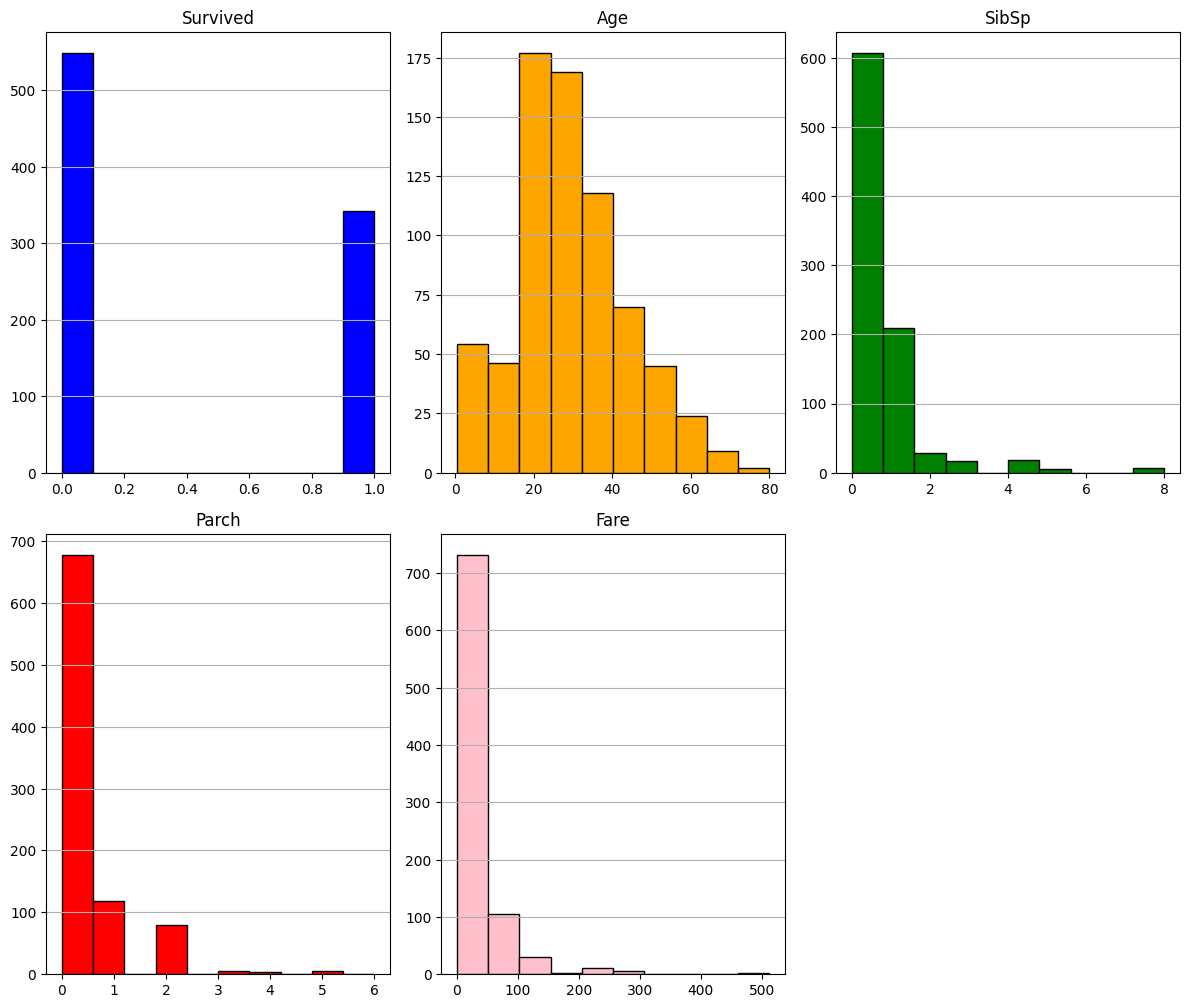

In [57]:
# TO-DO : Using matplotlib histograms, draw the distributions for numerical data

import matplotlib.pyplot as plt
colors = ['blue', 'orange', 'green', 'red', 'pink']

#Données numériques excluant 'PassengerId'new
new_df_num = df_num.drop(columns=['PassengerId'])

#Colonnes dans la grille
nb_cols = len(new_df_num.columns)

#Dimensions de la grille
fig, axes = plt.subplots(nrows=nb_cols, ncols=3, figsize=(12, nb_cols * 5))

#Histogrammes pour chaque colonne numérique
for i, col in enumerate(new_df_num.columns):
    ax = axes.flatten()[i]
    ax.hist(new_df_num[col].dropna(), color=colors[i], edgecolor='black')
    ax.set_title(col)
    ax.grid(axis='y')

#Les sous-plots inutilisés
for i in range(nb_cols, nb_cols * 3):
    fig.delaxes(axes.flatten()[i])

#Mise en page
plt.tight_layout()
plt.show()

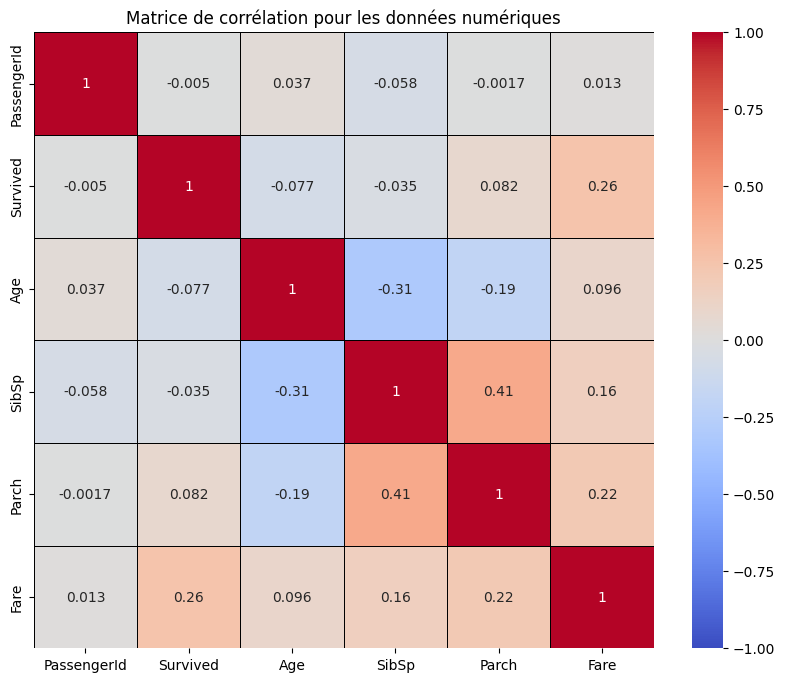

In [58]:
# TO-DO: Utiliser seaborn pour dessiner la heatmap de la matrice de corrélation et expliquer son rôle
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation pour les données numériques
matrix_corr = df_num.corr()

# Configurer la visualisation avec seaborn
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(matrix_corr, annot=True, cmap="coolwarm", center=0, robust=True,
                      vmin=-1, vmax=1, linewidths=0.5, linecolor='black')

# Ajouter un titre
plt.title('Matrice de corrélation pour les données numériques')

# Afficher la heatmap
plt.show()


### Corrélation à -0,34  entre les variables Survived et Pclass:
Interpretation: Il y a une corrélation relativement forte entre les variables Survived et Pclass.Cela signifie que lorsque la variable Pclass augmente, la valeur de la variable Survived a tendance à diminuer. Autrement dit lorsque qu'on est dans une classe de voyage plus basse, la probabilité de survivre augmente relativement.

### Corrélation à 0,26 entre les variables Survived et Fare:
Interpretation: Il y a une corrélation relativement forte entre les variables Survived et Fare.Cela signifie que lorsque la variable Fare augmente, la valeur de la variable Survived a tendance à augmenter relativement. Autrement dit lorsque qu'on a payé un tarif plus cher, la probabilité de survivre augmente relativement.

### Corrélation entre Survived et les autres variables :
Interpretation: Les autres variables ne sont pas significatives relativement au fait de survire ou pas vu qu'elles ont une correlation pratiquement nulle

In [59]:
# TO-DO :
    # Look up pivot tables in pandas and explain what they do
    # draw them for the numerical variables with a mean aggrregation

# Créons un tableau croisé dynamique
tcd_Survived_mean_ = pd.pivot_table(df_num, index='Survived', aggfunc='mean')
tcd_Parch_mean = pd.pivot_table(df_num, index='Parch', aggfunc='mean')

# Affichage du tableau croisé dynamique

print("***************************************************************************")
print(tcd_Survived_mean_)
print("***************************************************************************")
print(tcd_Parch_mean)
print("***************************************************************************")

***************************************************************************
                Age       Fare     Parch  PassengerId     SibSp
Survived                                                       
0         30.626179  22.117887  0.329690   447.016393  0.553734
1         28.343690  48.395408  0.464912   444.368421  0.473684
***************************************************************************
             Age       Fare  PassengerId     SibSp  Survived
Parch                                                       
0      32.178503  25.586774   445.255162  0.237463  0.343658
1      24.422000  46.778180   465.110169  1.084746  0.550847
2      17.216912  64.337604   416.662500  2.062500  0.500000
3      33.200000  25.951660   579.200000  1.000000  0.600000
4      44.500000  84.968750   384.000000  0.750000  0.000000
5      39.200000  32.550000   435.200000  0.600000  0.200000
6      43.000000  46.900000   679.000000  1.000000  0.000000
*******************************************

In [60]:
# TO-DO :
    # Look up pivot tables in pandas and explain what they do
    # draw them for the numerical variables with a mean aggrregation

#Création d'un TCD pour réorganiser et de résumer les données

# Créez des intervalles d'âge en utilisant pd.cut
#Liste qui définit les bornes inférieures des intervalles d'âge. Chaque élément de cette liste délimite le début d'une catégorie d'âge
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]

#Liste d'étiquettes correspondant aux intervalles définis dans age_bins. Chaque étiquette est associée à une plage d'âge spécifique,
#attribue une étiquette à chaque intervalle d'âge correspondant aux bornes définies.
#Ces étiquettes seront utilisées comme valeurs dans la nouvelle colonne 'Age_Group' créée dans le DataFrame
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
df_num['Age_Group'] = pd.cut(df_num['Age'], bins=age_bins, labels=age_labels, right=False)

# Créez un pivot table avec des intervalles d'âge
nb_survived_age = pd.pivot_table(df_num, values='PassengerId', index='Survived', columns='Age_Group', aggfunc='count', fill_value='No value')

#Liste qui définit les bornes inférieures des intervalles de prix. Chaque élément de cette liste délimite le début d'une catégorie de tarif (Min=0 et Max= 512.329200)
fare_bins = [0, 50, 100, 150, 200, 250, 300, 550]

#Après une première execution, j'ai vu qu'il avait aucun passager qui avait acheter un billet avec le cout entre 301€ et 500 € dont j'ai supprimé ces bornes
fare_labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '501-550']
df_num['Fare_Group'] = pd.cut(df_num['Fare'], bins=fare_bins, labels=fare_labels, right=False)

nb_survived_fare = pd.pivot_table(df_num, values='PassengerId', index='Survived', columns='Fare_Group', aggfunc='count', fill_value='No value')


# Afficher le TCD comptage de l'echantillon
print("Denombrement de l'echantillon :")
#print(nb_survived_pclass)
print("--------------------------")
print(nb_survived_fare)
print("--------------------------")
print(nb_survived_age)

print("--------------------------")

Denombrement de l'echantillon :
--------------------------
Fare_Group  0-50  51-100  101-150  151-200  201-250  251-300  501-550
Survived                                                             
0            497      38        5        3        4        2        0
1            233      70       19        6        7        4        3
--------------------------
Age_Group  0-10  11-20  21-30  31-40  41-50  51-60  61-70  71-80
Survived                                                        
0            24     61    143     94     55     28     13      6
1            38     41     77     73     34     20      6      0
--------------------------


<ipython-input-60-956487228355>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Age_Group'] = pd.cut(df_num['Age'], bins=age_bins, labels=age_labels, right=False)
<ipython-input-60-956487228355>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Fare_Group'] = pd.cut(df_num['Fare'], bins=fare_bins, labels=fare_labels, right=False)


In [61]:
!pip install seaborn matplotlib

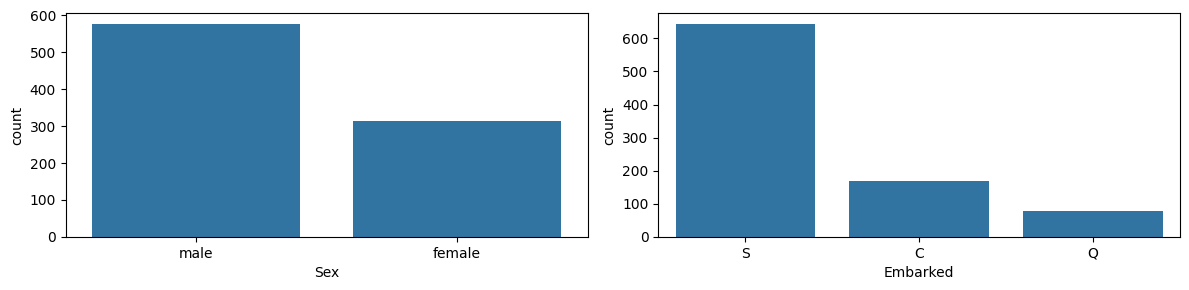

In [62]:
# TO-DO : Using sns barplot, draw the barplots for the categorical variables

import matplotlib.pyplot as plt
import seaborn as sns


# Définir les colonnes à afficher (uniquement 'Sex' et 'Embarked')
colonnes= ['Sex', 'Embarked']

# Définir la taille de la figure
plt.figure(figsize=(12, 3))

# Parcourir les colonnes sélectionnées pour tracer les barplots
for i, colonne in enumerate(colonnes, start=1):
    # Créer des sous-graphiques
    plt.subplot(1, len(colonnes), i)

    # Tracer le barplot pour la colonne catégorique
    sns.countplot(x=colonne, data=df_cat)

    # Définir le nom de l'axe x
    plt.xlabel(colonne)
    # Rotation des étiquettes de l'axe x pour une meilleure lisibilité
    #plt.xticks(rotation=45)

plt.tight_layout()  # Ajuster la mise en page pour éviter les chevauchements
plt.show()  # Afficher les barplots


In [63]:
# TO-DO :
    # Create the pivot table for the categorical variables for which it makes sense
    # Explain why it does not make sense for the others

nb_survived_pclass= pd.pivot_table(df_cat, values='PassengerId',index='Survived', columns='Pclass', aggfunc='count')
tcd_Sex_nb_ = pd.pivot_table(df_cat, values='PassengerId',index='Survived', columns='Sex',aggfunc='count')
tcd_Embarked_nb_ = pd.pivot_table(df_cat, values='PassengerId',index='Survived', columns='Embarked',aggfunc='count')

print("-----------------------------------------------")
print(nb_survived_pclass)
print("-----------------------------------------------")
print(tcd_Sex_nb_)
print("-----------------------------------------------")
print(tcd_Embarked_nb_)
print("-----------------------------------------------")
print("\n")
print("Pour les variables 'Name' et 'Ticket', elle ne represente aucune information significative car on ne veut pas savoir si une personne specifique a survecu ou pas, on ne peut pas les grouper.")
print("Il en est de même pour la variable 'Ticket' car on ne veut pas savoir quel ticket prit pas une personne a survecu")
print("En somme, il est important de faire un TCD pour une variable catégorielle si on veut faire une Analyse de fréquence,Statistiques agrégées( somme, moyenne, comptage).")

-----------------------------------------------
Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
-----------------------------------------------
Sex       female  male
Survived              
0             81   468
1            233   109
-----------------------------------------------
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217
-----------------------------------------------


Pour les variables 'Name' et 'Ticket', elle ne represente aucune information significative car on ne veut pas savoir si une personne specifique a survecu ou pas, on ne peut pas les grouper.
Il en est de même pour la variable 'Ticket' car on ne veut pas savoir quel ticket prit pas une personne a survecu
En somme, il est important de faire un TCD pour une variable catégorielle si on veut faire une Analyse de fréquence,Statistiques agrégées( somme, moyenne, comptage).


In [64]:
# TO-DO :
    # Explore the variable Cabin's values
    # Can we use this variable directly? if not, how can we exploit it efficiently

print(df_cat['Cabin'])
print("\n\nOn ne peut pas l'utiliser directement. On va la catégoriser de manière à la rendre plus exploitable")

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object


On ne peut pas l'utiliser directement. On va la catégoriser de manière à la rendre plus exploitable


## 4) Data Engineering
When exploiting datasets, data engineering is an important preprocessing step. Its goal is to extract more information from the data so to increase the predictive power of the machine learning model.
Identify some variables on which we can apply data engineering and explain what type of information can be extratced from them.

In [65]:
# Here is an example of data engineering from the variable Cabin, we used it to create a new variable called Cabin_multiple that contains the number of cabins per passenger.
df_train['Cabin_multiple'] = df_train.Cabin.apply(lambda x : 0 if pd.isna(x) else len(x.split(' ')))
df_train['Cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: Cabin_multiple, dtype: int64

In [66]:
# TO-DO : Create the pivot table for the newly created attribute.

tcd_Cabin_multiple_nb_ = pd.pivot_table(df_train, values='PassengerId',index='Survived', columns='Cabin_multiple',aggfunc='count')
print(tcd_Cabin_multiple_nb_)

Cabin_multiple      0      1    2    3    4
Survived                                   
0               481.0   58.0  7.0  3.0  NaN
1               206.0  122.0  9.0  3.0  2.0


In [67]:
# TO-DO : Create the variables you think might be interesting then draw the pivot tables for the variables you create

df_train['Age_class'] = df_train['Age'].apply(lambda age: 'Moins de 18 ans' if age < 18 else ('18-29 ans' if 18 <= age < 30 else ('30-49 ans' if 30 <= age < 50 else '50 ans et plus')))
age_class_counts = df_train['Age_class'].value_counts()
print(age_class_counts)
tcd_Age_class_nb_ = pd.pivot_table(df_train, values='PassengerId',index='Survived', columns='Age_class',aggfunc='count')
print("------------------------------------------------------------------")
print(tcd_Age_class_nb_)
print("------------------------------------------------------------------")

18-29 ans          271
30-49 ans          256
50 ans et plus     251
Moins de 18 ans    113
Name: Age_class, dtype: int64
------------------------------------------------------------------
Age_class  18-29 ans  30-49 ans  50 ans et plus  Moins de 18 ans
Survived                                                        
0                176        149             172               52
1                 95        107              79               61
------------------------------------------------------------------


## 5) Data Preperation
All of the operations done so far were done on the training set. However, when we test our model, the test data needs to have the same format as the training data (the created variables, the deleted variables, ...).

### 5.1) Data transformation:
A quick way to do that, is to combine both datasets and apply the operations applied previously on the combined dataset.

In [68]:
df_test = pd.read_csv('data/titanic/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [69]:
import numpy as np
df_train['train'] = 1
df_test['train'] = 0
df_test['Survived'] = np.NaN
df_all = pd.concat([df_train, df_test])
df_all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_multiple,Age_class,train
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,18-29 ans,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,30-49 ans,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,18-29 ans,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,30-49 ans,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,30-49 ans,1


In [70]:
# TO-DO : Use the .info() function from pandas and get the information about the dataset after the changes
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     1309 non-null   int64  
 1   Survived        891 non-null    float64
 2   Pclass          1309 non-null   int64  
 3   Name            1309 non-null   object 
 4   Sex             1309 non-null   object 
 5   Age             1046 non-null   float64
 6   SibSp           1309 non-null   int64  
 7   Parch           1309 non-null   int64  
 8   Ticket          1309 non-null   object 
 9   Fare            1308 non-null   float64
 10  Cabin           295 non-null    object 
 11  Embarked        1307 non-null   object 
 12  Cabin_multiple  891 non-null    float64
 13  Age_class       891 non-null    object 
 14  train           1309 non-null   int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 163.6+ KB


In [71]:
df_all['Age'] = df_all['Age'].fillna(df_all['Age'].median())
df_all['Fare'] = df_all['Fare'].fillna(df_all['Fare'].median())

### 5.2) Handling missing data :
There are different ways to handle missing data in a dataset. Name some of them.

List the variables with missing values.

For every variable named, handle the missing variables in the way you see fits.

#### Suppression des lignes :
*On peut choisir de supprimer les lignes qui contiennent des données manquantes. Cependant, cette méthode peut entraîner une perte d'informations si les données manquantes sont importantes.*

#### Imputation par la moyenne ou la médiane :
*On peut remplacer les valeurs manquantes par la moyenne ou la médiane des valeurs existantes dans la colonne respective. C'est couramment utilisé pour les données numériques.*

#### Imputation par la valeur la plus fréquente :
*Pour les variables catégorielles, on peut remplacer les valeurs manquantes par la valeur la plus fréquente de cette variable.*

In [72]:
# Affichage avant et après le remplacement des valeurs manquantes
print("Avant le remplacement des valeurs manquantes :")
print(df_all.isnull().sum())  # Vérifier le nombre de valeurs manquantes dans le jeu de données avant le remplacement

Avant le remplacement des valeurs manquantes :
PassengerId          0
Survived           418
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin             1014
Embarked             2
Cabin_multiple     418
Age_class          418
train                0
dtype: int64


In [73]:
df_all['Survived'] = df_all['Survived'].fillna(df_all['Survived'].mode()[0])
df_all['Cabin'] = df_all['Cabin'].fillna(df_all['Cabin'].mode()[0])
df_all['Embarked'] = df_all['Embarked'].fillna(df_all['Embarked'].mode()[0])
df_all['Cabin_multiple'] = df_all['Cabin_multiple'].fillna(df_all['Cabin_multiple'].mode()[0])
df_all['Age_class'] = df_all['Age_class'].fillna(df_all['Age_class'].mode()[0])

In [74]:
print("\nAprès le remplacement des valeurs manquantes :")
print(df_all.isnull().sum()) # Vérifier que les valeurs manquantes dans le jeu de données ont été comblées


Après le remplacement des valeurs manquantes :
PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin             0
Embarked          0
Cabin_multiple    0
Age_class         0
train             0
dtype: int64


### 5.3) Categorical variables transformation :
Fully connected neural networks (FCNNs) are known for not being able to handle categorical variables in their natural state.

Using one hot encoding (.get dummies function from pandas), create a new version of the dataset with transformed categorical variables.

In [75]:
# First, we transform the Pclass variable to string because it is a categorical variable
df_all['Pclass'] = df_all['Pclass'].astype(str)
df_all['Sex'] = df_all['Sex'].astype(str)
df_all['Embarked'] = df_all['Embarked'].astype(str)
df_all['Cabin_multiple'] = df_all['Cabin_multiple'].astype(str)
df_all['Age_class'] = df_all['Age_class'].astype(str)
#df_all['Cabin_multiple'] = df_all['Cabin_multiple'].astype(str) #Idem pour la variable 'Cabin_multiple'
#df_all = df_all.drop(columns=['Ticket','Name'])
# TO-DO : One hot encoding

df_encoding = pd.get_dummies(df_all, columns=['Sex','Embarked', 'Pclass', 'Cabin_multiple','Age_class'])

In [76]:
df_encoding

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,train,...,Pclass_3,Cabin_multiple_0.0,Cabin_multiple_1.0,Cabin_multiple_2.0,Cabin_multiple_3.0,Cabin_multiple_4.0,Age_class_18-29 ans,Age_class_30-49 ans,Age_class_50 ans et plus,Age_class_Moins de 18 ans
0,1,0.0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,C23 C25 C27,1,...,1,1,0,0,0,0,1,0,0,0
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,...,0,0,1,0,0,0,0,1,0,0
2,3,1.0,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,C23 C25 C27,1,...,1,1,0,0,0,0,1,0,0,0
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,...,0,0,1,0,0,0,0,1,0,0
4,5,0.0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,C23 C25 C27,1,...,1,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0.0,"Spector, Mr. Woolf",28.0,0,0,A.5. 3236,8.0500,C23 C25 C27,0,...,1,1,0,0,0,0,1,0,0,0
414,1306,0.0,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,0,...,0,1,0,0,0,0,1,0,0,0
415,1307,0.0,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,C23 C25 C27,0,...,1,1,0,0,0,0,1,0,0,0
416,1308,0.0,"Ware, Mr. Frederick",28.0,0,0,359309,8.0500,C23 C25 C27,0,...,1,1,0,0,0,0,1,0,0,0


In [77]:
# TO-DO : Get the information for the newly created dataset
df_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                1309 non-null   int64  
 1   Survived                   1309 non-null   float64
 2   Name                       1309 non-null   object 
 3   Age                        1309 non-null   float64
 4   SibSp                      1309 non-null   int64  
 5   Parch                      1309 non-null   int64  
 6   Ticket                     1309 non-null   object 
 7   Fare                       1309 non-null   float64
 8   Cabin                      1309 non-null   object 
 9   train                      1309 non-null   int64  
 10  Sex_female                 1309 non-null   uint8  
 11  Sex_male                   1309 non-null   uint8  
 12  Embarked_C                 1309 non-null   uint8  
 13  Embarked_Q                 1309 non-null   uint8 

In [78]:
# TO-DO : Create a second version of the dataset from the one previously created but without the variables you created with data engineering
df_encoding_bis = df_encoding.drop(columns=['Cabin','Age','Name','Ticket'])

In [79]:
df_encoding_bis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                1309 non-null   int64  
 1   Survived                   1309 non-null   float64
 2   SibSp                      1309 non-null   int64  
 3   Parch                      1309 non-null   int64  
 4   Fare                       1309 non-null   float64
 5   train                      1309 non-null   int64  
 6   Sex_female                 1309 non-null   uint8  
 7   Sex_male                   1309 non-null   uint8  
 8   Embarked_C                 1309 non-null   uint8  
 9   Embarked_Q                 1309 non-null   uint8  
 10  Embarked_S                 1309 non-null   uint8  
 11  Pclass_1                   1309 non-null   uint8  
 12  Pclass_2                   1309 non-null   uint8  
 13  Pclass_3                   1309 non-null   uint8 

In [80]:
# TO-DO : Separate the training data from the test data
data_train = df_encoding[df_encoding['train'] == 1]
data_test = df_encoding[df_encoding['train'] == 0]
X_train = data_train.drop(columns=['Survived'])
X_test = data_test.drop(columns=['Survived'])
Y_train = data_train['Survived']
Y_test = data_test['Survived']
print(X_train.shape, Y_train.shape)
print(X_test.shape)

(891, 26) (891,)
(418, 26)


In [81]:
# TO-DO : Separate the training data from the test data for the dataset without variables that are feature engineered
data_train_bis = df_encoding_bis[df_encoding_bis['train'] == 1]
data_test_bis = df_encoding_bis[df_encoding_bis['train'] == 0]
X_train_bis = data_train_bis.drop(columns=['Survived'])
X_test_bis = data_test_bis.drop(columns=['Survived'])
print(X_train_bis.shape, Y_train.shape)
print(X_test_bis.shape)

(891, 22) (891,)
(418, 22)


## 6) Model Creation
Using keras, create a Neural Network and train it on the data generated.

In [82]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

# TO-DO : Model creation

model = Sequential()
model.add(Dense(1024, activation='relu' ,input_shape=(X_train_bis.shape[1],)))
model.add(Dropout(0.5))

model.add(Dense(1024, activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))

model.add(Dense(1024, activation='relu',kernel_regularizer=l2(0.001) ))
model.add(Dropout(0.5))

model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(1,activation='sigmoid'))
# TO-DO : Model training
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [95]:
model.fit(X_train_bis, Y_train, epochs=50)

Epoch 1/20
28/28 [==============================] - 1s 38ms/step - loss: 0.4261 - accuracy: 0.8294
Epoch 2/20
28/28 [==============================] - 1s 38ms/step - loss: 0.4283 - accuracy: 0.8137
Epoch 3/20
28/28 [==============================] - 1s 38ms/step - loss: 0.4377 - accuracy: 0.8126
Epoch 4/20
28/28 [==============================] - 2s 56ms/step - loss: 0.4336 - accuracy: 0.8182
Epoch 5/20
28/28 [==============================] - 1s 38ms/step - loss: 0.4304 - accuracy: 0.8182
Epoch 6/20
28/28 [==============================] - 1s 37ms/step - loss: 0.4229 - accuracy: 0.8159
Epoch 7/20
28/28 [==============================] - 1s 37ms/step - loss: 0.4545 - accuracy: 0.8114
Epoch 8/20
28/28 [==============================] - 1s 38ms/step - loss: 0.4433 - accuracy: 0.8204
Epoch 9/20
28/28 [==============================] - 1s 37ms/step - loss: 0.4493 - accuracy: 0.8204
Epoch 10/20
28/28 [==============================] - 1s 39ms/step - loss: 0.4422 - accuracy: 0.8025
Epoch 11/

In [96]:
# Evaluate your model
# TO-DO : Specify the parameters for this function
score = model.evaluate(x= X_test_bis, y = Y_test)
print("Test accuracy:", score[1])

14/14 [==============================] - 0s 6ms/step - loss: 0.4094 - accuracy: 0.8158
Test accuracy: 0.8157894611358643


In [92]:
# This code transforms the results to binary (0 or 1) from the probabilities predicted by the model
pred_val = (model.predict(X_test_bis) > 0.5).astype(int).flatten()
len(pred_val)

14/14 [==============================] - 0s 5ms/step


418

In [93]:
# This code formats the results to a submission format (Call the lab assistant to learn more about this !)
formated_results = {'PassengerId' : df_test['PassengerId'], 'Survived' : pred_val}
formated_results = pd.DataFrame(formated_results)
formated_results.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [94]:
# Saving the results in a csv file
formated_results.to_csv('data/titanic/results.csv', index = False)